# Correlation bars of the 3 models WMT budget terms

In [1]:
import xarray as xr
import pandas as pd
from matplotlib import pyplot as plt
import gcsfs
import numpy as np
import json
from scipy.stats import pearsonr

In [2]:
with open('/home/jovyan/pangeo-181919-f141378dc975.json') as token_file:
    token = json.load(token_file)
gcfs_w_token = gcsfs.GCSFileSystem(token=token)

In [3]:
e = pd.read_csv('/home/jovyan/chapter1/ECCO-budgets/ecco_budgt_ind', index_col='time')
ss = pd.read_csv('/home/jovyan/chapter1/SOSE-budgets/sose_budgt_ind', index_col='time')
sd = pd.read_csv('/home/jovyan/chapter1/SODA/soda_budgt_ind', index_col='time')

In [117]:
ecco = e.dropna().corr()
sose = ss.dropna().corr()
soda = sd.dropna().corr()

<AxesSubplot: xlabel='time'>

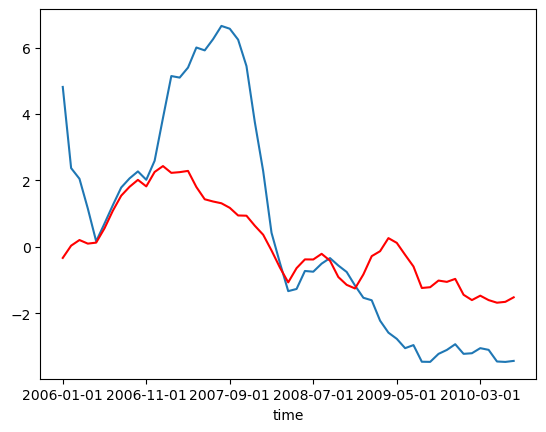

In [108]:
ss.dropna().dvdt.plot()
ss.dropna().psi.plot(color='r')

In [111]:
dvdt_norm = ss.dropna().dvdt / ss.dropna().dvdt.std()
psi_norm = ss.dropna().psi /ss.dropna().psi.std()

<AxesSubplot: xlabel='time'>

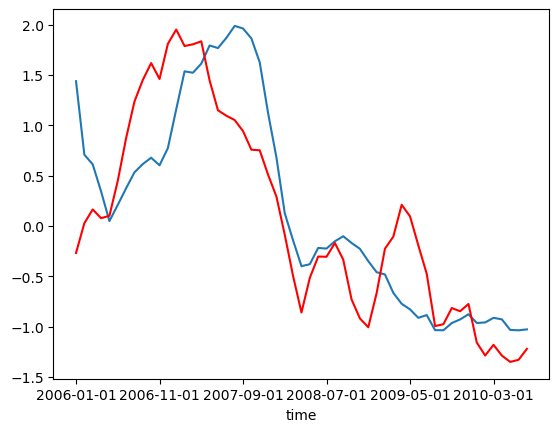

In [112]:
dvdt_norm.plot()
psi_norm.plot(color='r')

In [113]:
import pandas as pd

In [114]:
dvdt_norm.cov(psi_norm)

0.8234979978334174

In [6]:
sose.iloc[:,0]

dvdt               1.000000
psi                0.595182
omega*             0.975655
enso              -0.376793
fw_flx             0.085441
heat_flx          -0.188948
sam               -0.187249
windstress_curl    0.329056
sose_si_index     -0.597766
Name: dvdt, dtype: float64

In [7]:
sose.iloc[:,0]

dvdt               1.000000
psi                0.595182
omega*             0.975655
enso              -0.376793
fw_flx             0.085441
heat_flx          -0.188948
sam               -0.187249
windstress_curl    0.329056
sose_si_index     -0.597766
Name: dvdt, dtype: float64

In [8]:
#pd.corr() pearson coeff without confidence p value
sose.iloc[0,1]

0.5951818532384449

In [105]:
dvdt_ss = ss_pearson.iloc[:,0]
psi_ss = ss_pearson.iloc[:,1]

In [109]:
#pvalue
pearsonr(dvdt_ss, psi_ss)[1]

1.178348280866134e-14

In [110]:
conf_matrix = np.empty_like(sose)

In [111]:
conf_matrix[0,0] = 1

In [112]:
conf_matrix

array([[1.00000000e+000, 7.74860419e-304, 7.74860419e-304,
        7.74860419e-304, 7.74860419e-304, 7.74860419e-304,
        7.74860419e-304, 7.74860419e-304, 3.25060610e-319],
       [7.74681715e-304, 7.74860419e-304, 7.74860419e-304,
        7.74860419e-304, 7.74860419e-304, 7.74860419e-304,
        7.74860419e-304, 7.74860419e-304, 3.25060610e-319],
       [7.74681715e-304, 7.74860419e-304, 7.74860419e-304,
        7.74860419e-304, 7.74860419e-304, 7.74860419e-304,
        7.74860419e-304, 7.74860419e-304, 3.25060610e-319],
       [0.00000000e+000, 7.74860416e-304, 7.74860419e-304,
        7.74860419e-304, 7.74860419e-304, 7.74860419e-304,
        7.74860419e-304, 7.74860419e-304, 7.74860419e-304],
       [0.00000000e+000, 7.74860416e-304, 7.74860419e-304,
        7.74860419e-304, 7.74860419e-304, 7.74860419e-304,
        7.74860419e-304, 7.74860419e-304, 7.74860419e-304],
       [0.00000000e+000, 7.74860416e-304, 7.74860419e-304,
        7.74860419e-304, 7.74860419e-304, 7.7486041

In [113]:
ss_pearson.iloc[:, 0]

time
2006-01-01    4.816389
2006-02-01    2.371830
2006-03-01    2.050435
2006-04-01    1.153909
2006-05-01    0.166883
2006-06-01    0.703713
2006-07-01    1.257041
2006-08-01    1.787295
2006-09-01    2.062347
2006-10-01    2.272299
2006-11-01    2.020536
2006-12-01    2.592533
2007-01-01    3.881631
2007-02-01    5.144023
2007-03-01    5.097375
2007-04-01    5.399234
2007-05-01    6.003433
2007-06-01    5.917288
2007-07-01    6.254501
2007-08-01    6.653647
2007-09-01    6.568969
2007-10-01    6.239449
2007-11-01    5.443742
2007-12-01    3.756430
2008-01-01    2.282586
2008-02-01    0.424124
2008-03-01   -0.478659
2008-04-01   -1.333039
2008-05-01   -1.267780
2008-06-01   -0.726267
2008-07-01   -0.748039
2008-08-01   -0.505503
2008-09-01   -0.337782
2008-10-01   -0.561750
2008-11-01   -0.756040
2008-12-01   -1.165576
2009-01-01   -1.533121
2009-02-01   -1.608599
2009-03-01   -2.221963
2009-04-01   -2.583585
2009-05-01   -2.769692
2009-06-01   -3.050816
2009-07-01   -2.958308
2009-0

In [9]:
import scipy

In [10]:
scipy.__version__

'1.9.1'

In [116]:
pearsonr(ss_pearson.iloc[:, 0], ss_pearson.iloc[:, 1]).statistic

0.8234979978334176

In [117]:
test = pearsonr(ss_pearson.iloc[:, 0], ss_pearson.iloc[:, 1])
test

PearsonRResult(statistic=0.8234979978334176, pvalue=1.178348280866134e-14)

In [118]:
test[1]

1.178348280866134e-14

In [119]:
test.confidence_interval()

ConfidenceInterval(low=0.7142426143365748, high=0.8935744510093505)

In [120]:
test.confidence_interval

<bound method PearsonRResult.confidence_interval of PearsonRResult(statistic=0.8234979978334176, pvalue=1.178348280866134e-14)>

In [121]:
test.confidence_interval(confidence_level=.95)

ConfidenceInterval(low=0.7142426143365748, high=0.8935744510093505)

In [118]:
def confidence_matrix(corr_arr, orig_df):
    """Function to create a matrix populated with Pearson's p-value.
       Input are the corr_arr: pandas df after running `.corr()` to 
       get output matrix the same shape corr matrices; and orig_df: to drop NaNs since 
       `pearsonr()` cannot run with NaNs in df."""
    
    conf_matrix = np.empty_like(corr_arr)
    pearson = orig_df.dropna()
    for i in np.arange(0,len(orig_df.columns)):
        for j in np.arange(0,len(orig_df.columns)): 
            conf_matrix[i, j] = pearsonr(pearson.iloc[:, i], pearson.iloc[:, j])[1]
            
    conf_df = pd.DataFrame(data=conf_matrix)
    conf_df.columns = corr_arr.columns.values
    conf_df.index = corr_arr.columns.values    
    
    return(conf_df)

In [119]:
def confidence_interval_low(corr_arr, orig_df):
    """Function to get lower end of confidence interval"""
    
    conf_matrix = np.empty_like(corr_arr)
    pearson = orig_df.dropna()
    for i in np.arange(0,len(orig_df.columns)):
        for j in np.arange(0,len(orig_df.columns)): 
            conf_matrix[i, j] = pearsonr(pearson.iloc[:, i], pearson.iloc[:, j]).confidence_interval(confidence_level=0.95)[0]
            
    conf_df = pd.DataFrame(data=conf_matrix)
    conf_df.columns = corr_arr.columns.values
    conf_df.index = corr_arr.columns.values    
    
    return(conf_df)

In [120]:
def confidence_interval_high(corr_arr, orig_df):
    """Function to get lower end of confidence interval"""
    
    conf_matrix = np.empty_like(corr_arr)
    pearson = orig_df.dropna()
    for i in np.arange(0,len(orig_df.columns)):
        for j in np.arange(0,len(orig_df.columns)): 
            conf_matrix[i, j] = pearsonr(pearson.iloc[:, i], pearson.iloc[:, j]).confidence_interval(confidence_level=0.95)[1]
            
    conf_df = pd.DataFrame(data=conf_matrix)
    conf_df.columns = corr_arr.columns.values
    conf_df.index = corr_arr.columns.values    
    
    return(conf_df)

In [121]:
ecco_conf = confidence_matrix(ecco, e.dropna())
sose_conf = confidence_matrix(sose, ss.dropna())
soda_conf = confidence_matrix(soda, sd.dropna())

In [122]:
ecco_conf_low = confidence_interval_low(ecco, e.dropna())
sose_conf_low = confidence_interval_low(sose, ss.dropna())
soda_conf_low = confidence_interval_low(soda, sd.dropna())

In [123]:
ecco_conf_high = confidence_interval_high(ecco, e.dropna())
sose_conf_high = confidence_interval_high(sose, ss.dropna())
soda_conf_high = confidence_interval_high(soda, sd.dropna())

## Below are the matrices for correlation, p value, low and high confidence interval boundaries

### ECCO

In [124]:
ecco

,dvdt,psi,omega*,enso,fw_flx,heat_flx,sam,windstress_curl,ecco_si_index
dvdt,1.000000,0.131564,0.709254,-0.014938,-0.094817,-0.057771,0.052113,0.054426,0.127142
psi,0.131564,1.000000,-0.521685,0.081641,0.071602,0.012859,0.147973,-0.127545,0.015274
omega*,0.709254,-0.521685,1.000000,0.039087,-0.117081,-0.070818,-0.015205,0.104606,0.074965
enso,-0.014938,0.081641,0.039087,1.000000,-0.056817,-0.106088,-0.152871,0.094528,0.025460
fw_flx,-0.094817,0.071602,-0.117081,-0.056817,1.000000,0.073913,0.125268,-0.278272,-0.185860
heat_flx,-0.057771,0.012859,-0.070818,-0.106088,0.073913,1.000000,-0.062163,0.122183,-0.119287
sam,0.052113,0.147973,-0.015205,-0.152871,0.125268,-0.062163,1.000000,-0.606089,-0.035224
windstress_curl,0.054426,-0.127545,0.104606,0.094528,-0.278272,0.122183,-0.606089,1.000000,0.170244
ecco_si_index,0.127142,0.015274,0.074965,0.025460,-0.185860,-0.119287,-0.035224,0.170244,1.000000


In [125]:
ecco_conf

,dvdt,psi,omega*,enso,fw_flx,heat_flx,sam,windstress_curl,ecco_si_index
dvdt,0.000000e+00,2.916125e-02,2.392464e-43,0.805209,0.116708,0.339855,3.893194e-01,3.685990e-01,0.035086
psi,2.916125e-02,0.000000e+00,1.349699e-20,0.177032,0.236613,0.831895,1.404121e-02,3.450591e-02,0.800923
omega*,2.392464e-43,1.349699e-20,0.000000e+00,0.518615,0.052452,0.241798,8.018029e-01,8.335395e-02,0.215261
enso,8.052093e-01,1.770315e-01,5.186149e-01,0.000000,0.347897,0.079050,1.113396e-02,1.178338e-01,0.674230
fw_flx,1.167085e-01,2.366135e-01,5.245239e-02,0.347897,0.000000,0.221785,3.788935e-02,2.779393e-06,0.001967
heat_flx,3.398554e-01,8.318948e-01,2.417977e-01,0.079050,0.221785,0.000000,3.043500e-01,4.291539e-02,0.048132
sam,3.893194e-01,1.404121e-02,8.018029e-01,0.011134,0.037889,0.304350,0.000000e+00,5.723323e-29,0.560812
windstress_curl,3.685990e-01,3.450591e-02,8.335395e-02,0.117834,0.000003,0.042915,5.723323e-29,0.000000e+00,0.004640
ecco_si_index,3.508554e-02,8.009231e-01,2.152605e-01,0.674230,0.001967,0.048132,5.608119e-01,4.640016e-03,0.000000


In [126]:
ecco_conf_low

,dvdt,psi,omega*,enso,fw_flx,heat_flx,sam,windstress_curl,ecco_si_index
dvdt,1.000000,0.013490,0.645089,-0.132987,-0.210738,-0.174860,-0.066581,-0.064272,0.008993
psi,0.013490,1.000000,-0.602773,-0.037000,-0.047081,-0.105586,0.030218,-0.242176,-0.103196
omega*,0.645089,-0.602773,1.000000,-0.079565,-0.232150,-0.187531,-0.133249,-0.013849,-0.043707
enso,-0.132987,-0.037000,-0.079565,1.000000,-0.173932,-0.221592,-0.266339,-0.024025,-0.093104
fw_flx,-0.210738,-0.047081,-0.232150,-0.173932,1.000000,-0.044762,0.007089,-0.383919,-0.297602
heat_flx,-0.174860,-0.105586,-0.187531,-0.221592,-0.044762,1.000000,-0.179130,0.003956,-0.234265
sam,-0.066581,0.030218,-0.133249,-0.266339,0.007089,-0.179130,1.000000,-0.675916,-0.152871
windstress_curl,-0.064272,-0.242176,-0.013849,-0.024025,-0.383919,0.003956,-0.675916,1.000000,0.053028
ecco_si_index,0.008993,-0.103196,-0.043707,-0.093104,-0.297602,-0.234265,-0.152871,0.053028,1.000000


In [127]:
ecco_conf_high

,dvdt,psi,omega*,enso,fw_flx,heat_flx,sam,windstress_curl,ecco_si_index
dvdt,1.000000,0.246020,0.763486,0.103528,0.023733,0.060930,0.169353,0.171605,0.241790
psi,0.246020,1.000000,-0.429931,0.198013,0.188291,0.130943,0.261677,-0.009403,0.133317
omega*,0.763486,-0.429931,1.000000,0.156647,0.001220,0.047867,0.103265,0.220166,0.191550
enso,0.103528,0.198013,0.156647,1.000000,0.061883,0.012351,-0.035224,0.210459,0.143312
fw_flx,0.023733,0.188291,0.001220,0.061883,1.000000,0.190531,0.239995,-0.165433,-0.069095
heat_flx,0.060930,0.130943,0.047867,0.012351,0.190531,1.000000,0.056537,0.237041,-0.001017
sam,0.169353,0.261677,0.103265,-0.035224,0.239995,0.056537,1.000000,-0.525477,0.083408
windstress_curl,0.171605,-0.009403,0.220166,0.210459,-0.165433,0.237041,-0.525477,1.000000,0.282833
ecco_si_index,0.241790,0.133317,0.191550,0.143312,-0.069095,-0.001017,0.083408,0.282833,1.000000


In [85]:
ecco.iloc[1,2]

-0.5216847690988218

In [86]:
-0.5216847690988218 - -0.602773

0.08108823090117823

In [87]:
-0.429931	 - -0.5216847690988218

0.09175376909882177

### SOSE

In [128]:
sose

,dvdt,psi,omega*,enso,fw_flx,heat_flx,sam,windstress_curl,sose_si_index
dvdt,1.000000,0.823498,0.979437,-0.376793,0.085441,-0.188948,-0.187249,0.329056,-0.597766
psi,0.823498,1.000000,0.707283,-0.048829,-0.019124,-0.056073,-0.144007,0.335810,-0.693117
omega*,0.979437,0.707283,1.000000,-0.404661,0.112696,-0.243564,-0.200589,0.326426,-0.529827
enso,-0.376793,-0.048829,-0.404661,1.000000,-0.048729,0.097899,-0.213924,0.159273,-0.052678
fw_flx,0.085441,-0.019124,0.112696,-0.048729,1.000000,-0.201085,-0.233505,0.001179,0.047623
heat_flx,-0.188948,-0.056073,-0.243564,0.097899,-0.201085,1.000000,0.040882,0.059058,0.049251
sam,-0.187249,-0.144007,-0.200589,-0.213924,-0.233505,0.040882,1.000000,-0.547278,-0.008497
windstress_curl,0.329056,0.335810,0.326426,0.159273,0.001179,0.059058,-0.547278,1.000000,-0.124578
sose_si_index,-0.597766,-0.693117,-0.529827,-0.052678,0.047623,0.049251,-0.008497,-0.124578,1.000000


In [132]:
sose_conf

,dvdt,psi,omega*,enso,fw_flx,heat_flx,sam,windstress_curl,sose_si_index
dvdt,0.000000e+00,1.178348e-14,1.589893e-38,0.004575,0.535105,0.167104,0.171023,0.014166,1.444710e-06
psi,1.178348e-14,0.000000e+00,1.575973e-09,0.723325,0.889778,0.684292,0.294209,0.012194,4.505668e-09
omega*,1.589893e-38,1.575973e-09,0.000000e+00,0.002181,0.412674,0.073146,0.141992,0.015005,3.185084e-05
enso,4.575248e-03,7.233251e-01,2.181422e-03,0.000000,0.723866,0.477039,0.116816,0.245437,7.024916e-01
fw_flx,5.351053e-01,8.897783e-01,4.126745e-01,0.723866,0.000000,0.140989,0.086207,0.993184,7.298966e-01
heat_flx,1.671041e-01,6.842917e-01,7.314552e-02,0.477039,0.140989,0.000000,0.766961,0.668432,7.210291e-01
sam,1.710229e-01,2.942094e-01,1.419922e-01,0.116816,0.086207,0.766961,0.000000,0.000015,9.509041e-01
windstress_curl,1.416584e-02,1.219373e-02,1.500455e-02,0.245437,0.993184,0.668432,0.000015,0.000000,3.648224e-01
sose_si_index,1.444710e-06,4.505668e-09,3.185084e-05,0.702492,0.729897,0.721029,0.950904,0.364822,0.000000e+00


In [130]:
sose_conf_low

,dvdt,psi,omega*,enso,fw_flx,heat_flx,sam,windstress_curl,sose_si_index
dvdt,1.000000,0.714243,0.964848,-0.583738,-0.184027,-0.432562,-0.431129,0.069857,-0.744928
psi,0.714243,1.000000,0.544077,-0.310109,-0.282986,-0.316659,-0.394242,0.077410,-0.809552
omega*,0.964848,0.544077,1.000000,-0.605007,-0.157304,-0.477976,-0.442347,0.066924,-0.697134
enso,-0.583738,-0.310109,-0.605007,1.000000,-0.310019,-0.171862,-0.453485,-0.110702,-0.313592
fw_flx,-0.184027,-0.282986,-0.157304,-0.310019,1.000000,-0.442762,-0.469705,-0.264201,-0.220460
heat_flx,-0.432562,-0.316659,-0.477976,-0.171862,-0.442762,1.000000,-0.226875,-0.209522,-0.218906
sam,-0.431129,-0.394242,-0.442347,-0.453485,-0.469705,-0.226875,1.000000,-0.709554,-0.273179
windstress_curl,0.069857,0.077410,0.066924,-0.110702,-0.264201,-0.209522,-0.709554,1.000000,-0.377402
sose_si_index,-0.744928,-0.809552,-0.697134,-0.313592,-0.220460,-0.218906,-0.273179,-0.377402,1.000000


In [131]:
sose_conf_high

,dvdt,psi,omega*,enso,fw_flx,heat_flx,sam,windstress_curl,sose_si_index
dvdt,1.000000,0.893574,0.988008,-0.123879,0.342964,0.080379,0.082128,0.546633,-0.395131
psi,0.893574,1.000000,0.818918,0.219309,0.247428,0.212384,0.126108,0.551936,-0.524213
omega*,0.988008,0.818918,1.000000,-0.156125,0.367020,0.023235,0.068345,0.544564,-0.307794
enso,-0.123879,0.219309,-0.156125,1.000000,0.219404,0.354002,0.054464,0.407358,0.215633
fw_flx,0.342964,0.247428,0.367020,0.219404,1.000000,0.067831,0.033891,0.266393,0.309016
heat_flx,0.080379,0.212384,0.023235,0.354002,0.067831,1.000000,0.302894,0.319352,0.310491
sam,0.082128,0.126108,0.068345,0.054464,0.033891,0.302894,1.000000,-0.329876,0.257380
windstress_curl,0.546633,0.551936,0.544564,0.407358,0.266393,0.319352,-0.329876,1.000000,0.145529
sose_si_index,-0.395131,-0.524213,-0.307794,0.215633,0.309016,0.310491,0.257380,0.145529,1.000000


In [140]:
0.707283 - 0.544077

0.16320599999999996

In [141]:
0.818918 - 0.707283

0.11163500000000004

### SODA

In [143]:
soda

,dvdt,psi,omega,soda,enso,sam,windstress_curl
dvdt,1.000000,0.177951,0.983693,-0.136460,-0.239064,0.034422,0.090341
psi,0.177951,1.000000,-0.001937,-0.458842,-0.044224,-0.170912,0.076536
omega,0.983693,-0.001937,1.000000,-0.054809,-0.234859,0.066214,0.077818
soda,-0.136460,-0.458842,-0.054809,1.000000,0.092342,0.056984,0.138755
enso,-0.239064,-0.044224,-0.234859,0.092342,1.000000,-0.122276,0.066275
sam,0.034422,-0.170912,0.066214,0.056984,-0.122276,1.000000,-0.615208
windstress_curl,0.090341,0.076536,0.077818,0.138755,0.066275,-0.615208,1.000000


In [144]:
soda_conf

,dvdt,psi,omega,soda,enso,sam,windstress_curl
dvdt,0.000000e+00,3.347133e-03,1.035186e-201,2.493754e-02,0.000073,5.733328e-01,1.387126e-01
psi,3.347133e-03,0.000000e+00,9.747232e-01,1.830207e-15,0.469281,4.861308e-03,2.099801e-01
omega,1.035186e-201,9.747232e-01,0.000000e+00,3.696620e-01,0.000098,2.782951e-01,2.024195e-01
soda,2.493754e-02,1.830207e-15,3.696620e-01,0.000000e+00,0.130143,3.509442e-01,2.258124e-02
enso,7.257699e-05,4.692811e-01,9.785204e-05,1.301433e-01,0.000000,4.470596e-02,2.778566e-01
sam,5.733328e-01,4.861308e-03,2.782951e-01,3.509442e-01,0.044706,0.000000e+00,1.654695e-29
windstress_curl,1.387126e-01,2.099801e-01,2.024195e-01,2.258124e-02,0.277857,1.654695e-29,0.000000e+00


In [145]:
soda_conf_low

,dvdt,psi,omega,soda,enso,sam,windstress_curl
dvdt,1.000000,0.059846,0.979317,-0.251735,-0.348494,-0.085305,-0.029351
psi,0.059846,1.000000,-0.121285,-0.548191,-0.162740,-0.284483,-0.043235
omega,0.979317,-0.121285,1.000000,-0.173053,-0.344574,-0.053585,-0.041947
soda,-0.251735,-0.548191,-0.173053,1.000000,-0.027335,-0.062819,0.019706
enso,-0.348494,-0.162740,-0.344574,-0.027335,1.000000,-0.238175,-0.053525
sam,-0.085305,-0.284483,-0.053585,-0.062819,-0.238175,1.000000,-0.684326
windstress_curl,-0.029351,-0.043235,-0.041947,0.019706,-0.053525,-0.684326,1.000000


In [146]:
soda_conf_high

,dvdt,psi,omega,soda,enso,sam,windstress_curl
dvdt,1.000000,0.291142,0.987149,-0.017367,-0.123204,0.153168,0.207480
psi,0.291142,1.000000,0.117466,-0.359138,0.075551,-0.052609,0.194138
omega,0.987149,0.117466,1.000000,0.064992,-0.118815,0.184135,0.195379
soda,-0.017367,-0.359138,0.064992,1.000000,0.209410,0.175168,0.253925
enso,-0.123204,0.075551,-0.118815,0.209410,1.000000,-0.002943,0.184193
sam,0.153168,-0.052609,0.184135,0.175168,-0.002943,1.000000,-0.535133
windstress_curl,0.207480,0.194138,0.195379,0.253925,0.184193,-0.535133,1.000000


In [151]:
0.983693 - 0.979317

0.0043760000000000465

In [152]:
0.987149 - 0.983693

0.0034560000000000146

### Correlation bargraphs

In [39]:
ecco_dvdt_psi = ecco.iloc[0, 1]
ecco_dvdt_omega = ecco.iloc[0, 2]
ecco_psi_omega = ecco.iloc[2, 1]

sose_dvdt_psi = sose.iloc[0, 1]
sose_dvdt_omega = sose.iloc[0, 2]
sose_psi_omega = sose.iloc[2, 1]

soda_dvdt_psi = soda.iloc[0, 1]
soda_dvdt_omega = soda.iloc[0, 2]
soda_psi_omega = soda.iloc[2, 1]

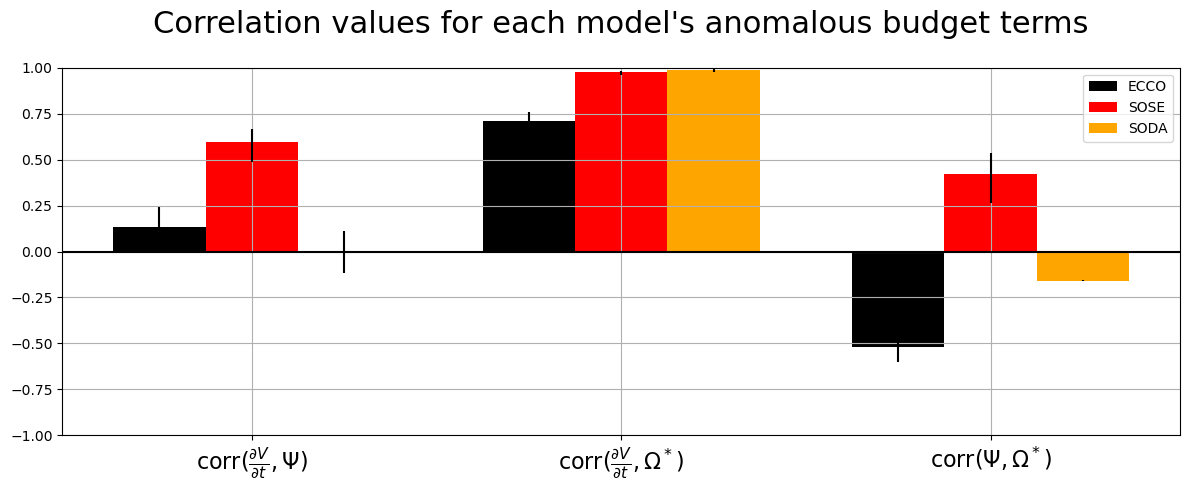

In [153]:
fig, ax = plt.subplots(1,1, figsize=(12,5))

data = [[ecco_dvdt_psi, ecco_dvdt_omega, ecco_psi_omega],
        [sose_dvdt_psi, sose_dvdt_omega, sose_psi_omega],
        [soda_dvdt_psi, soda_dvdt_omega, soda_psi_omega]]
X = np.arange(3)

yerr_ecco = np.array([[0.12, 0.06, 0.08], [0.11, 0.05, 0.09]])
yerr_sose = np.array([[0.11, 0.015, 0.16], [0.07, 0.009, 0.11]])
yerr_soda = np.array([[0.12, 0.01, 0.004], [0.11, 0.01, 0.003]])

ax.bar(X + 0.00, data[0], color = 'k', width = 0.25, label='ECCO', yerr=yerr_ecco)
ax.bar(X + 0.25, data[1], color = 'r', width = 0.25, label='SOSE', yerr=yerr_sose)
ax.bar(X + 0.50, data[2], color = 'orange', width = 0.25, label='SODA', yerr=yerr_soda)



ax.axhline(y=0, color='k')
ticks = [r"corr($\frac{\partial V}{\partial t},\Psi$)", 
         r"corr($\frac{\partial V}{\partial t},\Omega^*$)", 
         r"corr($\Psi,\Omega^*$)"]
ax.set_xticks(X + 0.25)
ax.set_xticklabels(ticks, fontsize=16)
ax.set_title("Correlation values for each model's anomalous budget terms", fontsize=22, pad=25)
ax.set_ylabel('')
ax.grid()
ax.set_ylim(-1,1)
plt.tight_layout()
plt.legend(loc='best')
plt.savefig('corr-bars.pdf', transparent=True);

In [160]:
ecco

,dvdt,psi,omega*,enso,fw_flx,heat_flx,sam,windstress_curl,ecco_si_index
dvdt,1.000000,0.131564,0.709254,-0.014938,-0.094817,-0.057771,0.052113,0.054426,0.127142
psi,0.131564,1.000000,-0.521685,0.081641,0.071602,0.012859,0.147973,-0.127545,0.015274
omega*,0.709254,-0.521685,1.000000,0.039087,-0.117081,-0.070818,-0.015205,0.104606,0.074965
enso,-0.014938,0.081641,0.039087,1.000000,-0.056817,-0.106088,-0.152871,0.094528,0.025460
fw_flx,-0.094817,0.071602,-0.117081,-0.056817,1.000000,0.073913,0.125268,-0.278272,-0.185860
heat_flx,-0.057771,0.012859,-0.070818,-0.106088,0.073913,1.000000,-0.062163,0.122183,-0.119287
sam,0.052113,0.147973,-0.015205,-0.152871,0.125268,-0.062163,1.000000,-0.606089,-0.035224
windstress_curl,0.054426,-0.127545,0.104606,0.094528,-0.278272,0.122183,-0.606089,1.000000,0.170244
ecco_si_index,0.127142,0.015274,0.074965,0.025460,-0.185860,-0.119287,-0.035224,0.170244,1.000000


In [155]:
sose

,dvdt,psi,omega*,enso,fw_flx,heat_flx,sam,windstress_curl,sose_si_index
dvdt,1.000000,0.823498,0.979437,-0.376793,0.085441,-0.188948,-0.187249,0.329056,-0.597766
psi,0.823498,1.000000,0.707283,-0.048829,-0.019124,-0.056073,-0.144007,0.335810,-0.693117
omega*,0.979437,0.707283,1.000000,-0.404661,0.112696,-0.243564,-0.200589,0.326426,-0.529827
enso,-0.376793,-0.048829,-0.404661,1.000000,-0.048729,0.097899,-0.213924,0.159273,-0.052678
fw_flx,0.085441,-0.019124,0.112696,-0.048729,1.000000,-0.201085,-0.233505,0.001179,0.047623
heat_flx,-0.188948,-0.056073,-0.243564,0.097899,-0.201085,1.000000,0.040882,0.059058,0.049251
sam,-0.187249,-0.144007,-0.200589,-0.213924,-0.233505,0.040882,1.000000,-0.547278,-0.008497
windstress_curl,0.329056,0.335810,0.326426,0.159273,0.001179,0.059058,-0.547278,1.000000,-0.124578
sose_si_index,-0.597766,-0.693117,-0.529827,-0.052678,0.047623,0.049251,-0.008497,-0.124578,1.000000


In [156]:
soda

,dvdt,psi,omega,soda,enso,sam,windstress_curl
dvdt,1.000000,0.177951,0.983693,-0.136460,-0.239064,0.034422,0.090341
psi,0.177951,1.000000,-0.001937,-0.458842,-0.044224,-0.170912,0.076536
omega,0.983693,-0.001937,1.000000,-0.054809,-0.234859,0.066214,0.077818
soda,-0.136460,-0.458842,-0.054809,1.000000,0.092342,0.056984,0.138755
enso,-0.239064,-0.044224,-0.234859,0.092342,1.000000,-0.122276,0.066275
sam,0.034422,-0.170912,0.066214,0.056984,-0.122276,1.000000,-0.615208
windstress_curl,0.090341,0.076536,0.077818,0.138755,0.066275,-0.615208,1.000000
